# CP-Decomposition using extremal optimization

Zeqian Li

Dec 10, 2019

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from heuristic_problems import CPDecomposition
from convex_optimizers import GradientDescent

In [21]:

def EO(T,K,optimizer,scale_initial=2,scale_resample=2, n_iteration=100,inspect=10,tau=1.2):
    
    cpd=CPDecomposition(T,K,optimizer=optimizer,scale_initial=2,scale_resample=2)
    print(cpd.energy)

    
    min_energy=cpd.energy
    min_vectors=cpd.vectors.copy()
    es=[cpd.energy]
    
    def rankdata(arr,small_to_large=True):
        if small_to_large:
            return np.argsort(np.argsort(arr))
        else:
            return len(arr)-np.argsort(np.argsort(arr))-1
    
    for i in range(n_iteration):
        steps, energies=cpd.get_local_step_candidates()
        rank=rankdata(energies,small_to_large=True)+1
        ps=rank**(-tau)
        ps/=np.sum(ps)

        step=np.random.choice(steps,p=ps)

        cpd.make_local_step(step)

        es.append(cpd.energy)
        if cpd.energy<min_energy:
            min_energy=cpd.energy
            min_vectors=cpd.vectors.copy()
        if i % inspect==0:
            print("i=%d, e=%.5f, step=%d" % (i,cpd.energy,step.k))
    
    
    return cpd,min_energy, min_vectors, es




## 1. On test tensor

In [35]:
T=np.random.randint(10,size=(10,10,10))
optimizer=GradientDescent(learning_rate=1E-5,max_iteration=1000)
#cpd=CPDecomposition(T,2,optimizer)
cpd,min_energy, min_vectors, es=EO(T,3,optimizer,scale_initial=2,scale_resample=2, n_iteration=1000,inspect=10,tau=1.0)

297066.6321878955
i=0, e=8079.15378, step=2
i=10, e=8183.21999, step=1
i=20, e=7700.71103, step=1
i=30, e=8212.88284, step=0
i=40, e=8190.06191, step=1
i=50, e=7803.53595, step=1
i=60, e=7851.62562, step=2
i=70, e=8325.23562, step=1
i=80, e=7815.04483, step=2
i=90, e=7773.88732, step=2
i=100, e=7750.99840, step=2
i=110, e=8246.16842, step=1
i=120, e=7932.08930, step=2
i=130, e=7602.87452, step=2
i=140, e=7726.04093, step=1
i=150, e=7848.49008, step=2
i=160, e=7944.99039, step=1
i=170, e=7799.64305, step=0
i=180, e=7940.70118, step=1
i=190, e=8027.96413, step=2
i=200, e=7954.86494, step=2
i=210, e=7932.70152, step=2
i=220, e=7961.42588, step=1
i=230, e=7955.15728, step=2
i=240, e=7977.73522, step=0
i=250, e=7932.74860, step=0
i=260, e=7926.34622, step=2
i=270, e=7895.92373, step=1
i=280, e=7613.07182, step=2
i=290, e=7981.75670, step=2
i=300, e=7659.63501, step=0
i=310, e=7983.57804, step=1
i=320, e=7858.64050, step=1
i=330, e=8029.77573, step=2
i=340, e=7976.48567, step=2
i=350, e=8067

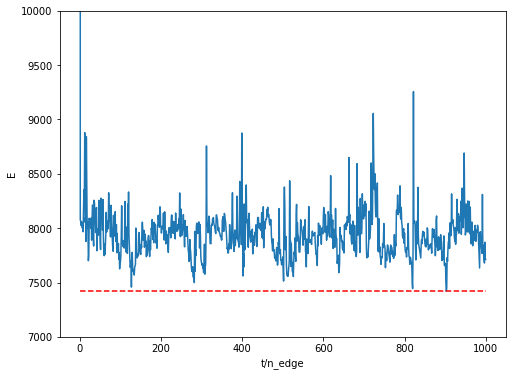

In [44]:
# Plot

plt.figure(figsize=(8,6))
xs=(np.arange(len(es)))
plt.plot(xs,es)
plt.plot(xs,min_energy*np.ones(xs.shape),color='red',linestyle='--')
plt.ylabel("E")
plt.xlabel("t/n_edge")
plt.ylim(top=10000,bottom=7000)
plt.savefig("EO-tensor-random.png")

In [ ]:
T=np.random.randint(10,size=(10,10,10))
optimizer=GradientDescent(learning_rate=1E-5,max_iteration=1000)


## 2. Picture

In [41]:
#from scipy ndimage import imread
from matplotlib.image import imread
img=imread("loomis.jpg")
img=
img.shape

(428, 640, 3)

In [48]:
T=img-img.mean()
optimizer=GradientDescent(learning_rate=1E-5,max_iteration=1000)
#cpd=CPDecomposition(T,2,optimizer)
cpd,min_energy, min_vectors, es=EO(T,3,optimizer,scale_initial=6,scale_resample=3, n_iteration=10,inspect=1,tau=1.0)

3197930562.7896175
i=0, e=nan, step=2
i=1, e=nan, step=1
i=2, e=nan, step=0
i=3, e=nan, step=0
i=4, e=nan, step=0
i=5, e=nan, step=0
i=6, e=nan, step=1
i=7, e=nan, step=1
i=8, e=nan, step=2
i=9, e=nan, step=2
